In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 당별로 부정/긍정 빈도수 확인

In [2]:
df = pd.read_csv('./data/news_2020_긍정부정결과_BertTokenizer.csv')

df

,party_content,party_name,label
0,미래통합당 자유한국당 대변인은 7일 논평을 통해 “안보와 경제가 경각에 달려 있는 ...,미래통합당,0
1,"민주당의 경우 '불참' 방침을 정한 외에 녹색당, 정도를 연합 파트너로 ...",녹색당,1
2,미래한국당 공관위는 사무총장과 외부인사 6명으로 구성한다,미래한국당,0
3,황 전 의원의 지역구 역시 공중분해 후 '춘천-철원-양구 을'로 재편된 가운...,더불어민주당,0
4,미래통합당도 가만있지 않았다,미래통합당,0
...,...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속,1
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당,1
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당,1
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당,1


In [3]:
df['label'].unique()

array([0, 1], dtype=int64)

In [6]:
df['label'] = df['label'].apply(lambda x: '긍정' if x == 1 else '부정')

In [4]:
df.head()

,party_content,party_name,label
0,미래통합당 자유한국당 대변인은 7일 논평을 통해 “안보와 경제가 경각에 달려 있는 ...,미래통합당,0
1,"민주당의 경우 '불참' 방침을 정한 외에 녹색당, 정도를 연합 파트너로 ...",녹색당,1
2,미래한국당 공관위는 사무총장과 외부인사 6명으로 구성한다,미래한국당,0
3,황 전 의원의 지역구 역시 공중분해 후 '춘천-철원-양구 을'로 재편된 가운...,더불어민주당,0
4,미래통합당도 가만있지 않았다,미래통합당,0


In [7]:
res_dic = {}


for party, label in zip(df['party_name'], df['label']):
    if party not in res_dic:
        res_dic[party] = {'긍정' : 0, '부정' : 0}
    else:
        res_dic[party][label] += 1

for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 미래통합당
긍정 : 5532
부정 : 45641
당 : 녹색당
긍정 : 535
부정 : 813
당 : 미래한국당
긍정 : 3950
부정 : 13963
당 : 더불어민주당
긍정 : 7363
부정 : 50104
당 : 더불어시민당
긍정 : 1633
부정 : 5726
당 : 정의당
긍정 : 4285
부정 : 13947
당 : 열린민주당
긍정 : 1415
부정 : 5436
당 : 무소속
긍정 : 2647
부정 : 9702
당 : 민생당
긍정 : 2969
부정 : 9482
당 : 공화당
긍정 : 687
부정 : 2556
당 : 우리공화당
긍정 : 589
부정 : 1839
당 : 코리아
긍정 : 235
부정 : 12125
당 : 미래당
긍정 : 5586
부정 : 9692
당 : 민중당
긍정 : 349
부정 : 2045
당 : 국민의당
긍정 : 2020
부정 : 9697
당 : 국가혁명배당금당
긍정 : 376
부정 : 1744
당 : 한국경제당
긍정 : 68
부정 : 540
당 : 한나라당
긍정 : 34
부정 : 744
당 : 우리당
긍정 : 130
부정 : 1029
당 : 새누리당
긍정 : 145
부정 : 2387
당 : 노동당
긍정 : 128
부정 : 331
당 : 친박신당
긍정 : 130
부정 : 633
당 : 새벽당
긍정 : 11
부정 : 57
당 : 기독자유통일당
긍정 : 63
부정 : 253
당 : 가자!평화인권당
긍정 : 35
부정 : 133
당 : 자영업당
긍정 : 6
부정 : 18
당 : 자유당
긍정 : 25
부정 : 216
당 : 국민새정당
긍정 : 29
부정 : 141
당 : 기본소득당
긍정 : 158
부정 : 447
당 : 가자환경당
긍정 : 88
부정 : 353
당 : 민중민주당
긍정 : 13
부정 : 13
당 : 통일민주당
긍정 : 15
부정 : 30
당 : 여성의당
긍정 : 19
부정 : 99
당 : 깨어있는시민연대당
긍정 : 4
부정 : 21
당 : 충청의미래당
긍정 : 8
부정 : 16
당 : 한국복지당
긍정 : 10
부정 : 8
당 

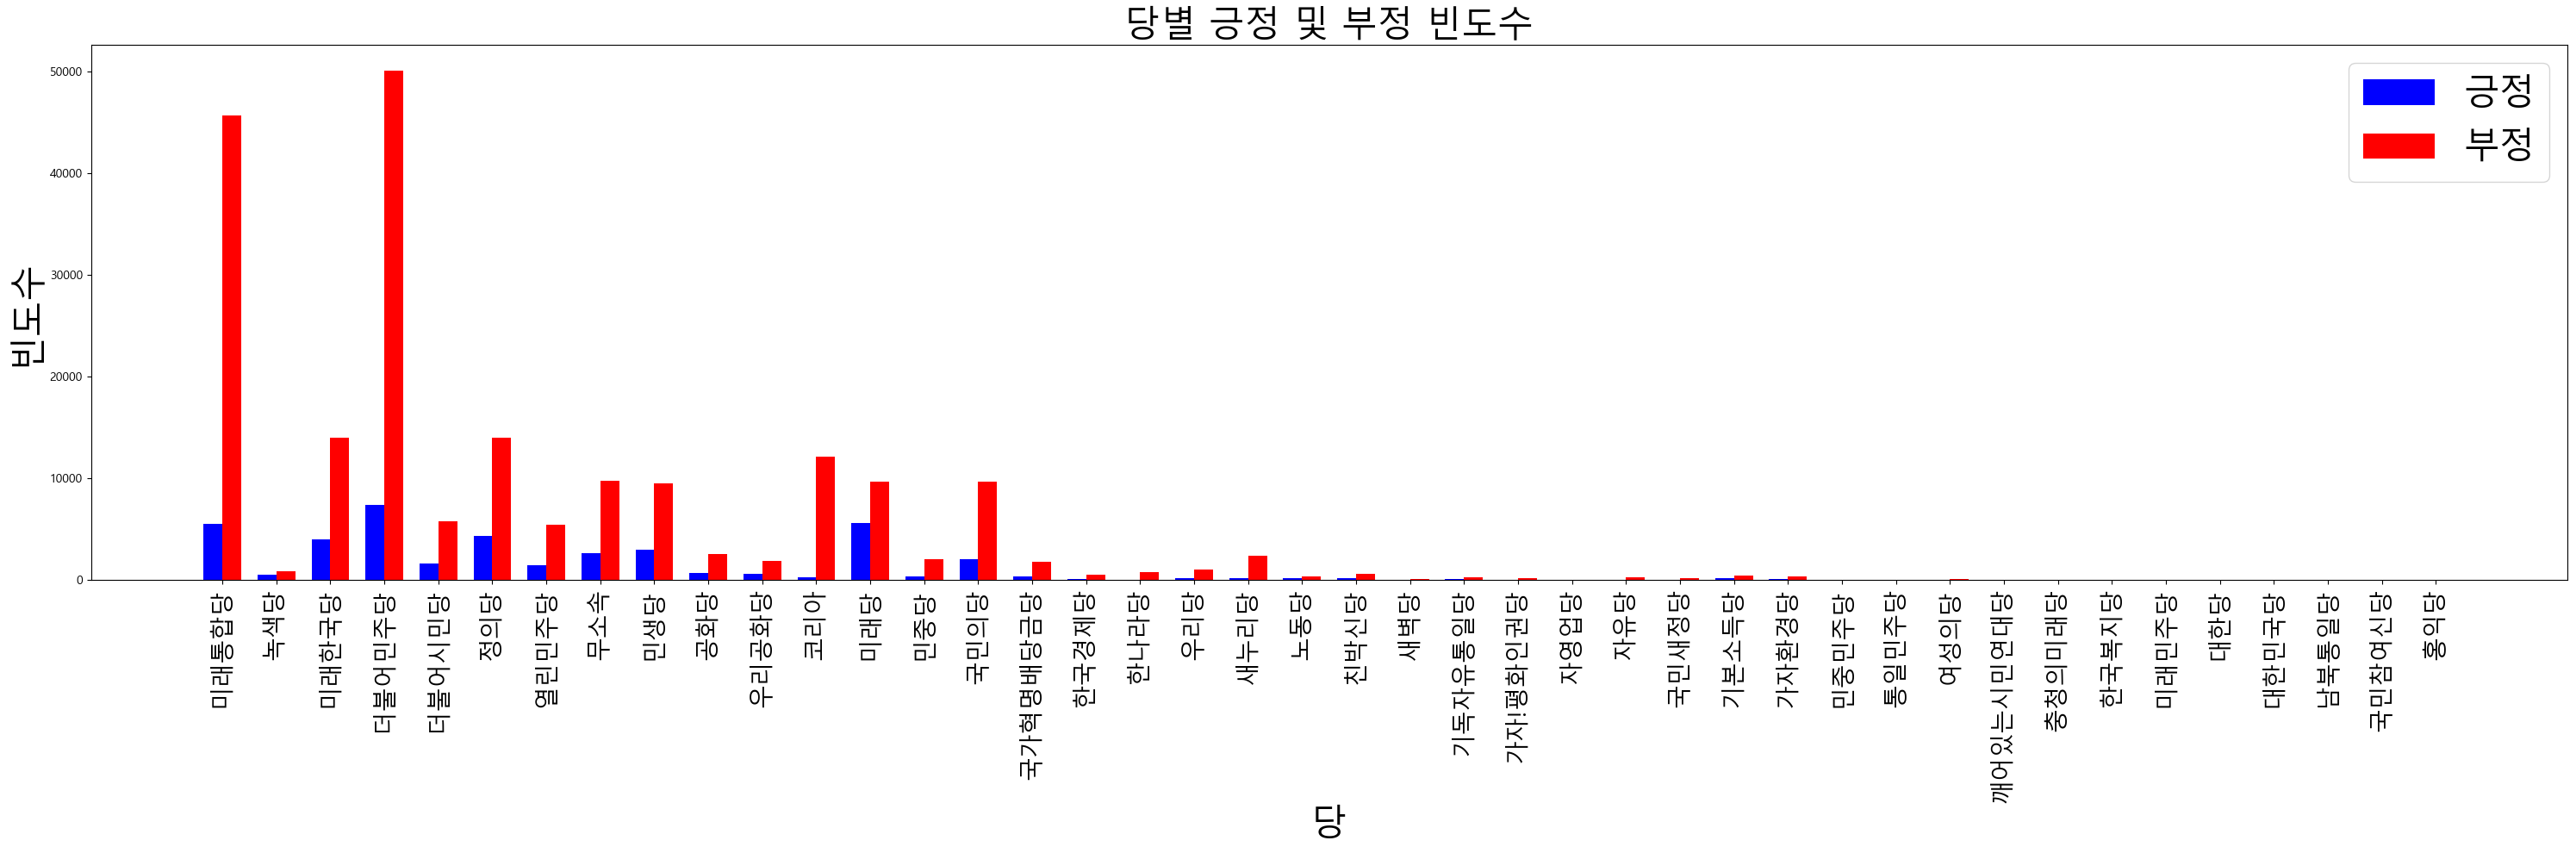

In [8]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [9]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(42, 2)


,긍정,부정
미래통합당,5532,45641
녹색당,535,813
미래한국당,3950,13963
더불어민주당,7363,50104
더불어시민당,1633,5726
정의당,4285,13947
열린민주당,1415,5436
무소속,2647,9702
민생당,2969,9482
공화당,687,2556


# 당선 여부 확인

In [10]:
res_df = pd.read_csv('./data/news_2020_당선결과.csv')
res_df

,name,party
0,이낙연,더불어민주당
1,고민정,더불어민주당
2,홍준표,무소속
3,배현진,미래통합당
4,심상정,정의당
...,...,...
295,이달곤,미래통합당
296,김철민,더불어민주당
297,김정호,더불어민주당
298,조정식,더불어민주당


In [11]:
res_gb = res_df.groupby(['party']).count().reset_index()

res_gb

,party,name
0,국민의당,3
1,더불어민주당,163
2,더불어시민당,17
3,무소속,5
4,미래통합당,84
5,미래한국당,19
6,열린민주당,3
7,정의당,6


In [12]:
# 부정 긍정 빈도수

num_df = num_df.reset_index()
num_df.columns = [['party', 'pos', 'neg']]
num_df.head()

,party,pos,neg
0,미래통합당,5532,45641
1,녹색당,535,813
2,미래한국당,3950,13963
3,더불어민주당,7363,50104
4,더불어시민당,1633,5726


In [13]:
# 멀티 인덱스 삭제

num_df.columns = num_df.columns.get_level_values(0)
num_df.columns

Index(['party', 'pos', 'neg'], dtype='object')

In [14]:
# 빈도수, 당선 수
num_res_df = pd.merge(res_gb, num_df, on = 'party', how = 'right')
num_res_df.fillna(0, inplace = True)
num_res_df.columns = [['party', 'res', 'pos', 'neg']]
num_res_df.columns = num_res_df.columns.get_level_values(0)
num_res_df = num_res_df.sort_values('res', ascending = False)
num_res_df = num_res_df.reset_index(drop = True)

num_res_df

,party,res,pos,neg
0,더불어민주당,163.0,7363,50104
1,미래통합당,84.0,5532,45641
2,미래한국당,19.0,3950,13963
3,더불어시민당,17.0,1633,5726
4,정의당,6.0,4285,13947
5,무소속,5.0,2647,9702
6,열린민주당,3.0,1415,5436
7,국민의당,3.0,2020,9697
8,깨어있는시민연대당,0.0,4,21
9,국민새정당,0.0,29,141


In [15]:
num_res_df.to_csv('./data/news_2020_결과_BertTokenizer.csv', index = False)

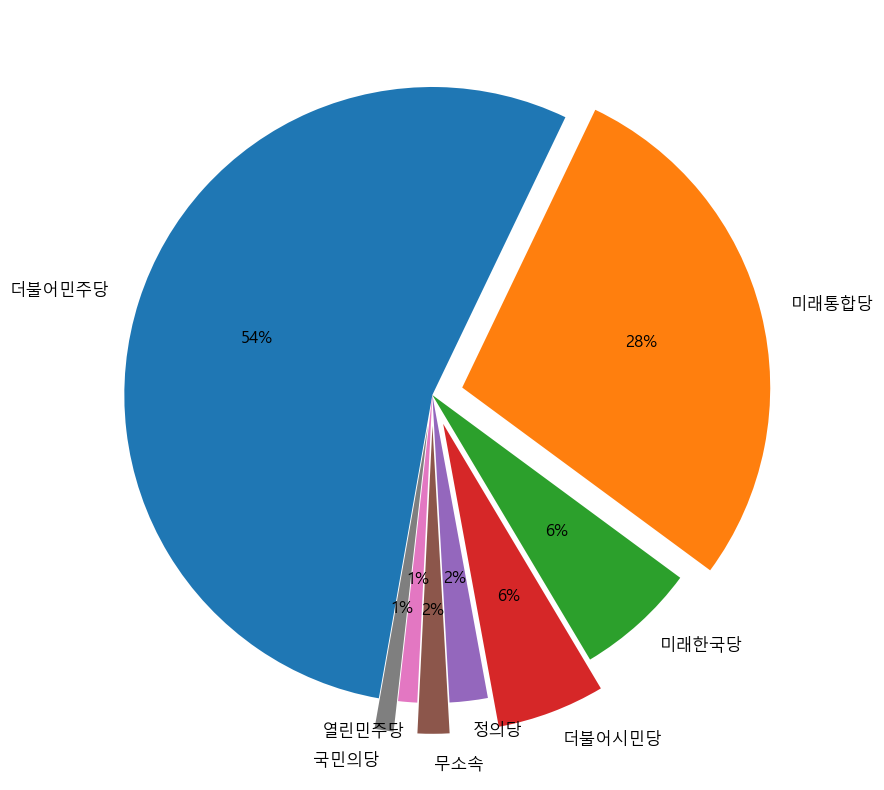

In [16]:
df = num_res_df[:8]

ratio = list(df['res'].values)
labels = list(df['party'].values)
explode = [0, 0.10, 0, 0.10, 0, 0.10, 0, 0.10]

plt.figure(figsize = (10, 10))
plt.rcParams.update({'font.size': 12})  # 원하는 폰트 크기로 변경
plt.pie(ratio, labels = labels, startangle=260, autopct='%1.0f%%', counterclock = False, explode = explode);

In [ ]:
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')


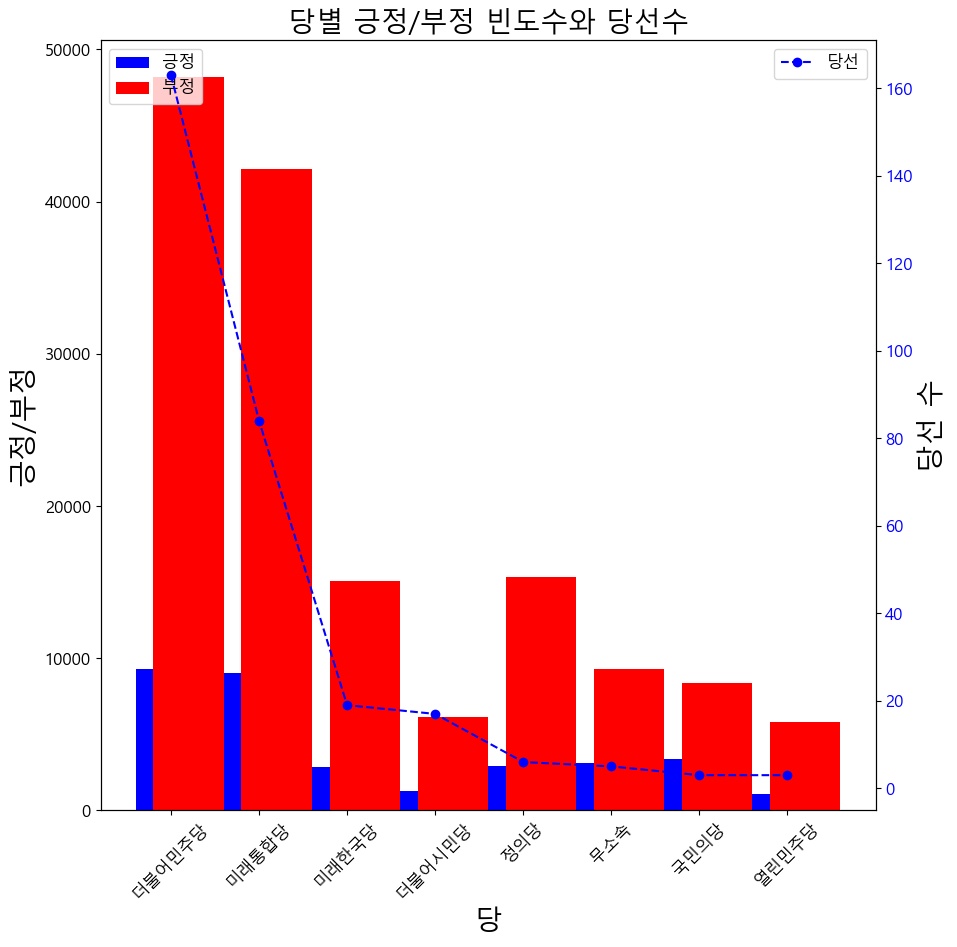

In [69]:
# 2중 그래프

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot() # bar 그래프


# bar 그래프 그리기
bar_width = 0.2
index = np.arange(len(df))
ax1.set_xticks(index);
ax1.set_xticklabels(df['party']);
ax1.bar(index, df['pos'], color = 'blue', label = '긍정')
ax1.bar(index + bar_width, df['neg'], color = 'red', label = '부정');
plt.xticks(rotation = 45);
plt.xlabel('당', fontsize = 20);
plt.ylabel('긍정/부정', fontsize = 20);
ax1.legend(loc = 'upper left');

# 선 그래프 그리기
ax2 = ax1.twinx();
ax2.plot(index, df['res'], color='b', linestyle='--', marker = 'o', label = '당선');
ax2.tick_params(axis = 'y', labelcolor = 'b');
plt.ylabel('당선 수', fontsize = 20);
ax2.legend();
plt.title('당별 긍정/부정 빈도수와 당선수', fontsize=20);